# Neural network demo

In [1]:
import numpy as np
import mnist
import simple_nn as nn

In [2]:
# The network hasn't been trained yet. There is no reason for it having a high accuracy.
nn.accuracy()

0.0958

In [3]:
# We train the neural network. This time the accuracy should be closer to 1.
nn.train()
nn.accuracy()

0.8752

Lets take a random image from the test dataset and see if the network recognizes correctly the handwritten digit. The [matplotlib.pyplot](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) module is used here only to visualize the image

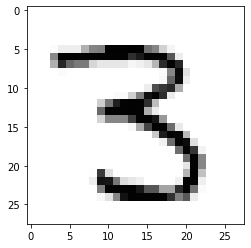

Label = 3


In [4]:
import matplotlib.pyplot as plt
idx = np.random.randint(10000) # A random integer between 0 and 9999
image = mnist.test_images()[idx]
label = mnist.test_labels()[idx]
plt.imshow(image, 'Greys')
plt.show()
print('Label =', label)

Now lets see what the output for that image is.

In [5]:
x, h, ha, y, ya = nn.forward_propagation(image)
print('Output =', ya.round(3))

Output = [0.002 0.    0.002 0.973 0.    0.02  0.    0.    0.002 0.001]


We get 10 values (each between 0 and 1) for each digit in ascending order from 0 to 9. The index of the highest value is the __guessed digit__: the digit that the network considers as the most likley to be on the image.

In [6]:
print('Guessed digit =', ya.argmax())

Guessed digit = 3


Lets build a bar chart to visulalise the output data.

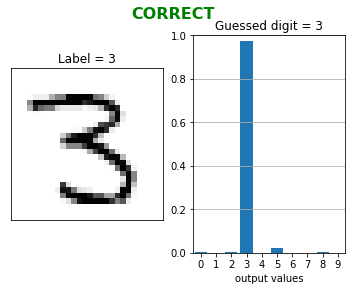

In [7]:
plt.figure(idx)
if label == ya.argmax():
    plt.suptitle('CORRECT', color='g', fontsize=16, fontweight='bold')
else:
    plt.suptitle('INCORRECT', color='r', fontsize=16, fontweight='bold')
plt.subplot(121)
plt.imshow(image, 'Greys')
plt.xticks([])
plt.yticks([])
plt.title('Label = ' + str(label))
plt.subplot(122)
plt.bar(range(10), ya)
plt.xticks(range(10), range(10))
plt.ylim(0, 1)
plt.xlim(-.5, 9.5)
plt.grid(axis='y')
plt.xlabel('output values')
plt.title('Guessed digit = ' + str(ya.argmax()))
plt.show()

## Training the network

### Forward propagation
For a given input $\mathbf{x}$ (flattened and normalized image of 784 unicolor pixels) the output $\mathbf{y_a}$ (10 estimations of probability for each digit) is obtained as follows:

$$
\begin{align}
&\mathbf{h} = \mathbf{x} \cdot \mathbf{W_1} + \mathbf{b_1}&& (1)
\\
&\mathbf{h_a} = S(\mathbf{h}) = {1 \over 1 + e^{\mathbf{-h}}}&& (2)
\\
&\mathbf{y} = \mathbf{h_a} \cdot \mathbf{W_2} + \mathbf{b_2}&& (3)
\\
&\mathbf{y_a} = \sigma(\mathbf{y}) = {e^{\mathbf{y}} \over \sum_{i=0}^{9} e^{(\mathbf{y})_i}}&& (4)
\end{align}
$$

Where
- $\mathbf{x} \in [0, 1]^{784}$ is the value of the input layer (composed of 784 neurons).
- $\mathbf{h} \in \mathbb{R}^{16}$ and $\mathbf{h_a} \in ]0, 1[^{16}$ are the values the hidden layer (16 neurons) before and after activation by the sigmoid function $S$.
- $\mathbf{y} \in \mathbb{R}^{10}$ and $\mathbf{y_a} \in ]0, 1[^{10}$ are the values of the output layer (10 neurons) before and after activation by the sofmax function $\sigma$.
- $\mathbf{W_1} \in \mathcal{M}_{784, 16}(\mathbb{R})$ and $\mathbf{W_2} \in \mathcal{M}_{16, 10}(\mathbb{R})$ are the weight matrices.
- $\mathbf{b_1} \in \mathbb{R}^{16}$  and $\mathbf{b_2} \in \mathbb{R}^{10}$ are the bias terms.


### Loss function
The cross entropy loss function $L$ is used to update the weights and biases of the network. It is calculated using the output $\mathbf{y_a}$ and the target $\mathbf{t}$ (a one hot vector obtained from the $label \in \left\{0,1,...,9 \right\}$ of the input image).

$$
\begin{align}
L(\mathbf{t},\mathbf{y_a}) &= -\sum_{i=0}^9 (\mathbf{t})_i \cdot \log (\mathbf{y_a})_i&& 
\\ & = - \log (\mathbf{y_a})_{label}&& (5)
\end{align}
$$

### Backpropagation

In order to update each of the learnable parameters (weights and biases) we need to calculate the gradient $\nabla L$ of the loss function:

$$
\begin{align}
\nabla L = 
\begin{bmatrix}
\partial L \over \partial \mathbf{b_1}
\\ 
\partial L \over \partial \mathbf{W_1}
\\
\partial L \over \partial \mathbf{b_2}
\\ 
\partial L \over \partial \mathbf{W_2}
\end{bmatrix}
&& (6)
\end{align}
$$

Before we start, here is a quick reminder of the derivative of the sofmax function $\sigma$:

$$
\begin{align}
{\partial \sigma \over \partial (\mathbf{y})_i} (\mathbf{y})_{label} = 
\begin{cases} 
(\mathbf{y_a})_{label} \cdot (1 - (\mathbf{y_a})_{label}) &\mbox{if } i = label
\\ 
(\mathbf{y_a})_{label} \cdot (\mathbf{y_a})_{i} &\mbox{else}
\end{cases} && (7)
\end{align}
$$

Let's calculate the derivatives with respect to each learning parameters of the network: $\partial L \over \partial \mathbf{b_2}$, $\partial L \over \partial \mathbf{W_2}$, $\partial L \over \partial \mathbf{b_1}$ and $\partial L \over \partial \mathbf{W_1}$.

$$
\begin{align}
{\partial L \over \partial \mathbf{b_2}}
&= {\partial L \over \partial \mathbf{y_a}} \cdot {\partial \mathbf{y_a} \over \partial \mathbf{y}} \cdot {\partial \mathbf{y} \over \partial \mathbf{b_2}}
\\
&= {- 1 \over (\mathbf{y_a})_{label}} \cdot {\partial \sigma \over \partial \mathbf{y}}(\mathbf{y})_{label}
\\
&= \mathbf{y_a} - \mathbf{t} && (8)
\\
\\
{\partial L \over \partial \mathbf{W_2}} 
&= {\partial L \over \partial \mathbf{y}} \cdot {\partial \mathbf{y} \over \partial \mathbf{W_2}}
\\
&= \mathbf{h_a}^T {\partial L \over \partial \mathbf{b_2}} && (9)
\\
\\
{\partial L \over \partial \mathbf{b_1}} 
&= {\partial L \over \partial \mathbf{h_a}} \cdot {\partial \mathbf{h_a} \over \partial \mathbf{b_1}}
\\
&= \mathbf{W_2} ({\partial L \over \partial \mathbf{b_2}})^T \cdot {\partial S \over \partial \mathbf{h}} (\mathbf{h})
\\
&= \mathbf{W_2} ({\partial L \over \partial \mathbf{b_2}})^T \cdot \mathbf{h_a} \cdot (1 - \mathbf{h_a}) && (10)
\\
\\
{\partial L \over \partial \mathbf{W_1}}
&= {\partial L \over \partial \mathbf{h}} \cdot {\partial \mathbf{h} \over \partial \mathbf{W_1}}
\\
&= \mathbf{x}^T {\partial L \over \partial \mathbf{b_1}} &&(11)
\end{align}
$$

Where $^T$ is the transpose operator. In our case for a any vector ${\mathbf v}^T$ is a column vector.

Note that ${\partial \mathbf{y} \over \partial \mathbf{b_2}} = \mathbf{1}_{\mathbb{R}^{10}}$ 
and ${\partial \mathbf{h} \over \partial \mathbf{b_1}} = \mathbf{1}_{\mathbb{R}^{16}}$, 
so ${\partial \mathbf{y_a} \over \partial \mathbf{b_2}} = {\partial \mathbf{y_a} \over \partial \mathbf{y}}$ 
and ${\partial \mathbf{h_a} \over \partial \mathbf{b_1}} = {\partial \mathbf{h_a} \over \partial \mathbf{h}}$.

## More testing

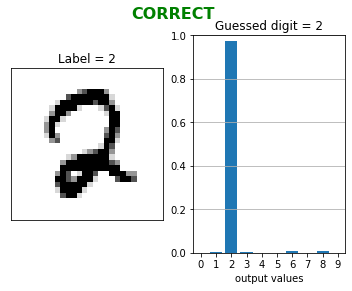

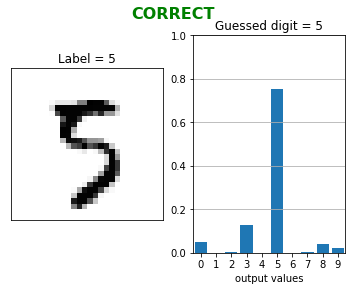

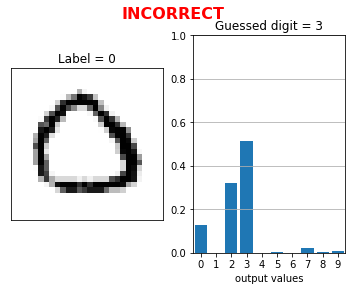

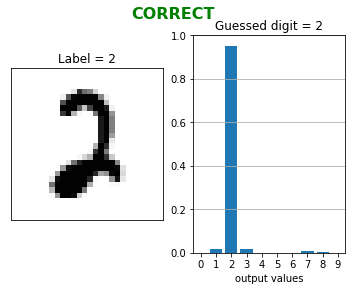

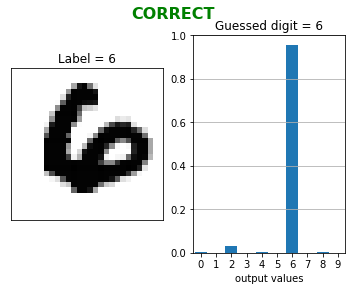

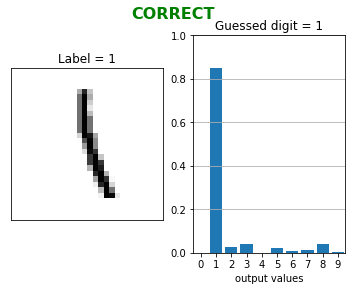

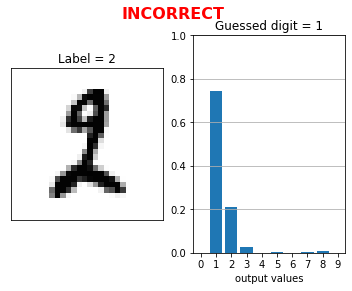

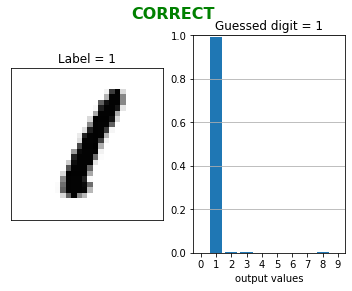

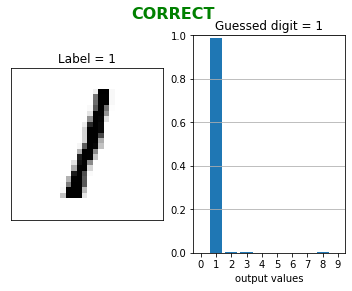

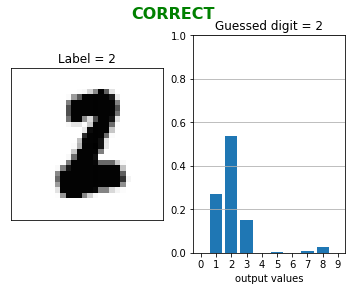

In [12]:
import matplotlib.pyplot as plt

n_examples = 10
image_ids = np.random.permutation(np.arange(10000))[:n_examples] # Random numbers between 0 and 9999

for id in image_ids:
    image = nn.test_images[id]
    label = nn.test_labels[id]
    x, h, ha, y, ya = nn.forward_propagation(image)
    plt.figure(id)
    if label == ya.argmax():
        plt.suptitle('CORRECT', color='g', fontsize=16, fontweight='bold')
    else:
        plt.suptitle('INCORRECT', color='r', fontsize=16, fontweight='bold')
    plt.subplot(121)
    plt.imshow(image, 'Greys')
    plt.xticks([])
    plt.yticks([])
    plt.title('Label = ' + str(label))
    plt.subplot(122)
    plt.bar(range(10), ya)
    plt.xticks(range(10), range(10))
    plt.ylim(0, 1)
    plt.xlim(-.5, 9.5)
    plt.grid(axis='y')
    plt.xlabel('output values')
    plt.title('Guessed digit = ' + str(ya.argmax()))
    plt.show()
